In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import blimpy
from blimpy.io import write_to_fil
import numpy as np
import itertools, json
from astropy.stats.sigma_clipping import sigma_clip
from scipy.optimize import curve_fit

In [2]:
from blimpy import Waterfall

filename = 'spliced_blc0001020304050607_guppi_57571_78180_HIP45653_0042.gpuspec.0002.h5'
filename_model = 'Model.spliced_blc0001020304050607_guppi_57571_78180_HIP45653_0042.gpuspec.0002.h5'
filename_data = 'spliced_blc0001020304050607_guppi_57571_78180_HIP45653_0042.gpuspec.0002.h5'
model_fil = Waterfall(filename_model)
data_fil = Waterfall(filename_data)

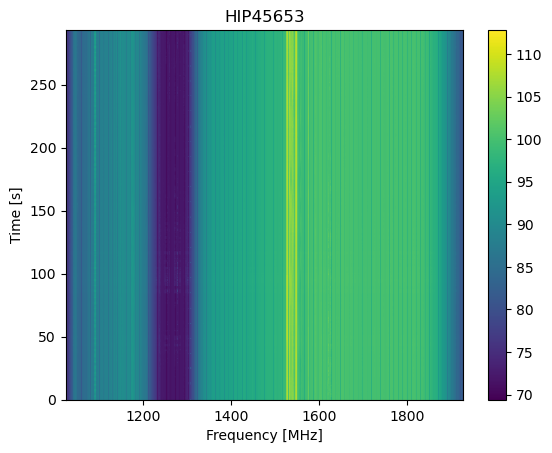

In [3]:
%matplotlib inline
data_fil.plot_waterfall()
plt.show()

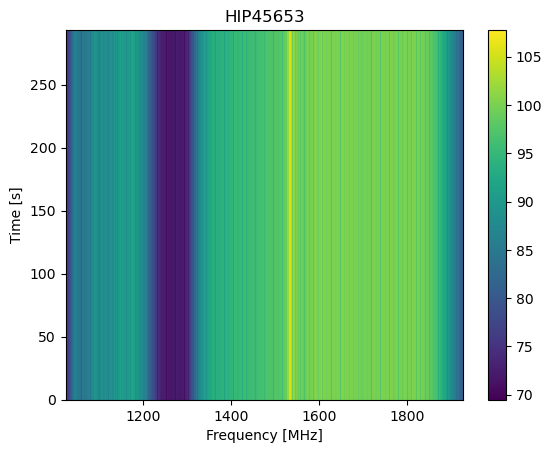

In [4]:
%matplotlib inline
model_fil.plot_waterfall()
plt.show()

In [5]:
model = np.flip(model_fil.data)
freqs_model = np.flip(model_fil.freqs)
data = np.flip(data_fil.data)
freqs_data = np.flip(data_fil.freqs)

In [6]:
signal_fil = data_fil

In [7]:

detrended = data - model
signal_fil.data = np.flip(detrended,axis = 2)
signal_fil.freqs = np.flip(freqs_model)

write_to_fil(signal_fil, filename_out = 'Detrended.' + filename)

blimpy.waterfall INFO     __write_to_fil_light: Writing the spectra matrix for Detrended.spliced_blc0001020304050607_guppi_57571_78180_HIP45653_0042.gpuspec.0002.h5 in one go.
blimpy.waterfall INFO     Conversion time: 0.17sec


/home/long/anaconda3/lib/python3.12/site-packages/blimpy/utils.py:12: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(x + offset)
/home/long/anaconda3/lib/python3.12/site-packages/blimpy/utils.py:12: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(x + offset)


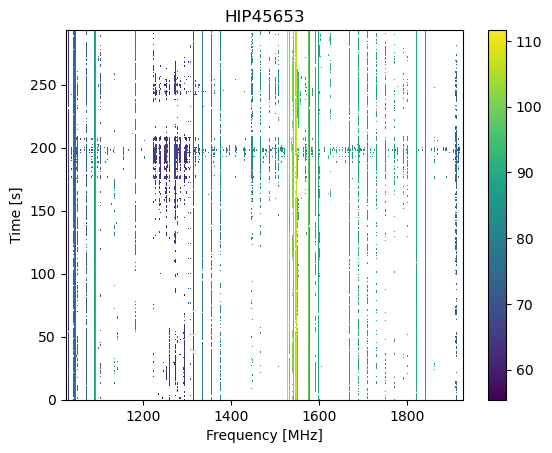

In [8]:
%matplotlib inline
signal_fil.plot_waterfall()
plt.show()

In [9]:
print(freqs_data.shape)

(315392,)


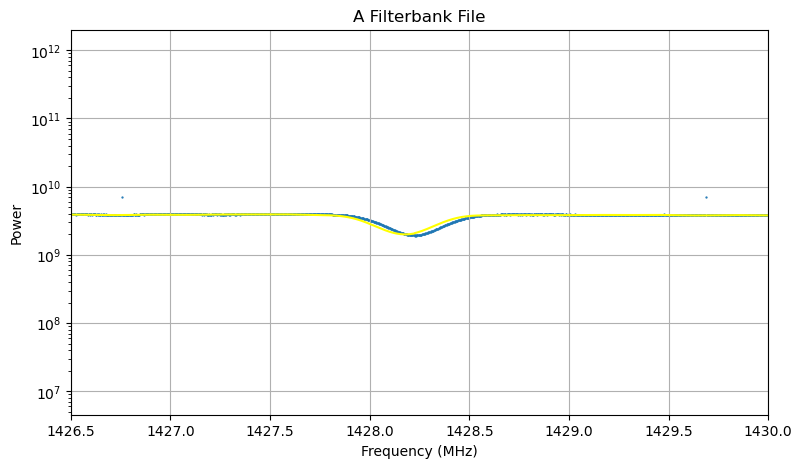

In [10]:
plt.figure(figsize=(9,5)) 
plt.scatter(freqs_data, np.mean(data[200:250,:,:],axis = 0)[0], s = 0.4) 
plt.plot(freqs_model, np.mean(model,axis = 0)[0],'yellow') 
plt.yscale('log')
plt.grid()
plt.xlim(1426.5,1430)
plt.xlabel("Frequency (MHz)") 
plt.ylabel("Power")
plt.title("A Filterbank File")
plt.show()

In [11]:
data_std = data
for i in range(3):
    std = np.sqrt(np.mean((data_std - model)**2))
    filtered = np.where(data_std >= 3*std)
    print(filtered)
    data_std[filtered] = model[filtered]
    print(std)


(array([  0,   0,   0, ..., 272, 272, 272]), array([0, 0, 0, ..., 0, 0, 0]), array([166399, 175104, 175105, ..., 210383, 229831, 236304]))
9238412000.0
(array([  0,   0,   0, ..., 272, 272, 272]), array([0, 0, 0, ..., 0, 0, 0]), array([   511,   1535,   2559, ..., 312831, 313855, 314879]))
951780800.0
(array([  0,   0,   0, ..., 272, 272, 272]), array([0, 0, 0, ..., 0, 0, 0]), array([  5398,   5408,   5414, ..., 314340, 314343, 314540]))
79891150.0


In [12]:
clipped = np.zeros_like(data)
mask = np.where(detrended >= 10*std)
clipped[mask] = detrended[mask]

In [13]:
print(mask)
print(np.max(clipped))

(array([  0,   0,   0, ..., 272, 272, 272]), array([0, 0, 0, ..., 0, 0, 0]), array([   511,   1535,   2559, ..., 312831, 313855, 314879]))
1532832300000.0


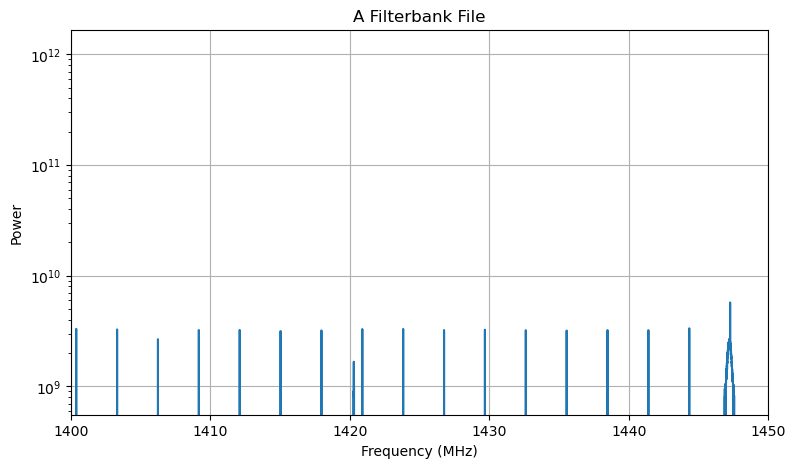

In [14]:
plt.figure(figsize=(9,5)) 
plt.plot(freqs_model, clipped[0,:,:][0]) 
plt.yscale('log')
plt.xlim(1400,1450)
plt.grid()
plt.xlabel("Frequency (MHz)") 
plt.ylabel("Power")
plt.title("A Filterbank File")
plt.show()

In [15]:
signal_fil.data = np.flip(clipped, axis = 2)
write_to_fil(signal_fil, filename_out = 'Clipped.' + filename)

blimpy.waterfall INFO     __write_to_fil_light: Writing the spectra matrix for Clipped.spliced_blc0001020304050607_guppi_57571_78180_HIP45653_0042.gpuspec.0002.h5 in one go.
blimpy.waterfall INFO     Conversion time: 0.17sec


In [38]:
print(signal_fil.data)
print(signal_fil.freqs)

[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]
[1926.26953125 1926.26667023 1926.2638092  ... 1023.93436432 1023.9315033
 1023.92864227]


In [16]:
#Normalized data
def normalize(arr, t_min, t_max):
    norm_arr = (arr - np.mean(arr)) / np.std(arr)
    return norm_arr

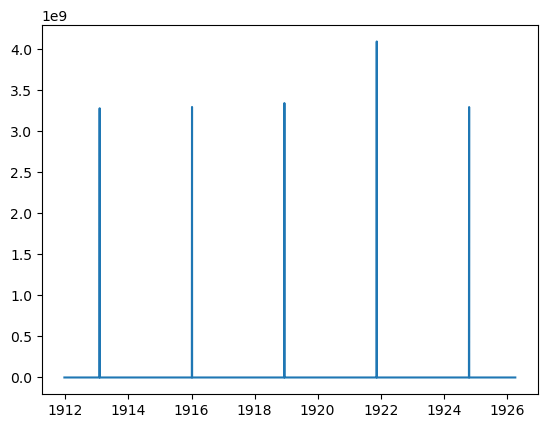

In [88]:
plt.plot(signal_fil.freqs[0:5000],signal_fil.data[0,0,0:5000])
plt.show()